<a href="https://colab.research.google.com/github/DylanGraves/DS-Unit-2-Sprint-2-Regression/blob/master/module1-ols-regression/linear-regression-assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split
# X = df.drop(columns='price')
# y = df['price']

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X = df[['sqft_lot']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17290, 1) (4323, 1) (17290,) (4323,)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
b1, b0 = model.coef_, model.intercept_
b1,b0

(array([0.84726972]), 525229.3479638515)

In [6]:
y_pred = model.predict(X_test)
y_pred

array([532764.11757768, 530931.47317481, 534458.6570163 , ...,
       528957.33472882, 533793.55028665, 534950.07345351])

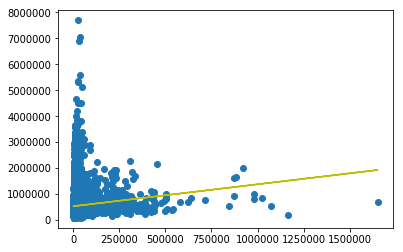

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X_test, y_pred, color='y')

In [10]:
import numpy as np

np.sqrt(mean_squared_error(y_test, y_pred))

387612.1629007626

In [11]:
r2_score(y_true=y_test, y_pred=y_pred)

0.006175047825244251

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [0]:
X2 = df[['sqft_living']]
y2 = df['price']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=.8, test_size=.2, random_state=42)

In [13]:
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
model2.intercept_, model2.coef_

(-41999.18603993731, array([279.55477932]))

In [15]:
y2_pred = model2.predict(X2_test)
y2_pred

array([ 536679.20714266,  768709.67397433, 1011922.33197861, ...,
        638437.14681341,  586999.06741941,  676456.59680029])

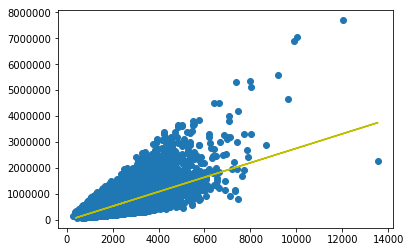

In [16]:
fig2, ax2 = plt.subplots()
ax2.scatter(X2,y2)
ax2.plot(X2_test,y2_pred,color='y')

In [17]:
np.sqrt(mean_squared_error(y2_test, y2_pred))

276559.1746114674

In [18]:
r2_score(y_true=y2_test, y_pred=y2_pred)

0.49406905389089006

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [19]:
X3 = df.drop(columns=['id','date','price'])
y3 = df['price']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size=.8, test_size=.2, random_state=42)
print(X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape)

(17290, 18) (4323, 18) (17290,) (4323,)


In [20]:
model3 = LinearRegression()
model3.fit(X3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
model3.intercept_, model3.coef_

(6643873.527888497,
 array([-3.43354187e+04,  4.45645289e+04,  1.09015817e+02,  8.88473539e-02,
         7.00312952e+03,  5.62413070e+05,  5.36411070e+04,  2.45267101e+04,
         9.45678917e+04,  7.00227409e+01,  3.89930758e+01, -2.68076890e+03,
         2.04156328e+01, -5.52253038e+02,  5.95968122e+05, -1.94585724e+05,
         2.12143306e+01, -3.25831873e-01]))

In [22]:
y3_pred = model3.predict(X3_test)
y3_pred

array([ 461209.94695861,  752443.51006939, 1238489.80205772, ...,
        423101.46384859,  617785.6141686 ,  442344.46084986])

In [23]:
np.sqrt(mean_squared_error(y3_test,y3_pred))

212539.51663817815

In [24]:
r2_score(y_true=y3_test,y_pred=y3_pred)

0.7011904448878395

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
